In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
from config import weather_api_key
import requests
from scipy.stats import linregress

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
#  random lat/long sets
lats = np.random.uniform(low= -90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_longs = list(zip(lats, longs))
lats_longs

[(83.73895977477383, 114.42090685469765),
 (6.454879336012766, 150.42556000258634),
 (82.23654637747455, 104.96139042248325),
 (41.821024407661014, 159.22708197355138),
 (51.040730200189785, -18.93067113047448),
 (-26.545660273608007, 148.89992558602194),
 (-23.433938600979317, -6.114983282881354),
 (-39.02205515748415, -3.6701407967016735),
 (25.99497790180672, 44.541297872243035),
 (-89.32767603653095, 141.13572265157143),
 (3.0054426312151605, -33.74887346279323),
 (-44.957026044839104, 71.84457098121845),
 (3.7083725644829997, -46.51150657842359),
 (-40.95769550329379, 155.19401965962976),
 (-5.526506586514273, -25.840797809982746),
 (-20.320173329318663, 108.98429829053651),
 (-56.81768203849616, 87.5924827869905),
 (7.329977770612132, -126.62768765944233),
 (-39.134709898804424, 178.9571640433079),
 (-19.846745220450472, 27.574208378450038),
 (-69.96347709656332, -60.05147965877026),
 (-42.71873840803602, 145.1061553385033),
 (72.38214364423916, 47.59743934735559),
 (87.127080524

In [4]:
# Create a list to hold cities
cities = []

# identify each city nearest to each set of coordinates
for coordinates in lats_longs:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

593

In [5]:
# 1. Create empty city list to hold cities
city_data = []

# print the start of logging
print("Beginning Data Retrieval")
print("------------------------")

# create counters for looping through cities
record_count = 1
set_count = 1

# 2. loop through cities
for i, city in enumerate(cities):
    # 3. group cities in sets of 50
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count += 1
        time.sleep(60)

# 4. build city url endpoint for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # 5. log the url and record/set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # add 1 to record count
    record_count += 1
    
    # 6. Run an API request for each of the cities.
    try:
        # 6. Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # 7. Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # 8. Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | dingle
Processing Record 6 of Set 1 | roma
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | buraydah
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | caucaia
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | salinopolis
Processing Record 14 of Set 1 | batemans bay
Processing Record 15 of Set 1 | cabedelo
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | tolaga bay
Processing Record 20 of Set 1 | kalakamati
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | burnie
Processing Record 23 of Set 1 | belushya guba
City 

Processing Record 192 of Set 4 | el prat de llobregat
Processing Record 193 of Set 4 | rawson
Processing Record 194 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 195 of Set 4 | tasiilaq
Processing Record 196 of Set 4 | srednekolymsk
Processing Record 197 of Set 4 | la ronge
Processing Record 198 of Set 4 | vila franca do campo
Processing Record 199 of Set 4 | meulaboh
Processing Record 200 of Set 4 | amderma
City not found. Skipping...
Processing Record 201 of Set 4 | turukhansk
Processing Record 202 of Set 4 | bud
Processing Record 203 of Set 4 | kita
Processing Record 205 of Set 5 | troitsko-pechorsk
Processing Record 206 of Set 5 | umm lajj
Processing Record 207 of Set 5 | nioro
Processing Record 208 of Set 5 | dongsheng
Processing Record 209 of Set 5 | salinas
Processing Record 210 of Set 5 | aketi
Processing Record 211 of Set 5 | coquimbo
Processing Record 212 of Set 5 | coahuayana
Processing Record 213 of Set 5 | port lincoln
Processing Record 214 of Set 5 

Processing Record 379 of Set 8 | altay
Processing Record 380 of Set 8 | leh
Processing Record 381 of Set 8 | kerema
Processing Record 382 of Set 8 | pochutla
Processing Record 383 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 384 of Set 8 | wicklow
Processing Record 385 of Set 8 | lorengau
Processing Record 386 of Set 8 | abonnema
Processing Record 387 of Set 8 | yulara
Processing Record 388 of Set 8 | pringsewu
Processing Record 389 of Set 8 | elmadag
Processing Record 390 of Set 8 | sakaiminato
Processing Record 391 of Set 8 | hofn
Processing Record 392 of Set 8 | kargil
Processing Record 393 of Set 8 | do rud
City not found. Skipping...
Processing Record 394 of Set 8 | juneau
Processing Record 395 of Set 8 | kailua
Processing Record 396 of Set 8 | yerbogachen
Processing Record 397 of Set 8 | mahebourg
Processing Record 398 of Set 8 | port hedland
Processing Record 399 of Set 8 | turochak
Processing Record 400 of Set 8 | anadyr
Processing Record 401 of Set 8 | pe

Processing Record 564 of Set 12 | krasnoselkup
Processing Record 565 of Set 12 | moree
Processing Record 566 of Set 12 | malakal
Processing Record 567 of Set 12 | ruy barbosa
Processing Record 568 of Set 12 | santa maria del oro
Processing Record 569 of Set 12 | mao
Processing Record 570 of Set 12 | colombo
Processing Record 571 of Set 12 | mantua
Processing Record 572 of Set 12 | sinkat
City not found. Skipping...
Processing Record 573 of Set 12 | bartica
Processing Record 574 of Set 12 | vanavara
Processing Record 575 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 576 of Set 12 | nyrob
Processing Record 577 of Set 12 | roanne
Processing Record 578 of Set 12 | snasa
Processing Record 579 of Set 12 | comodoro rivadavia
Processing Record 580 of Set 12 | ust-ordynskiy
Processing Record 581 of Set 12 | gustavo diaz ordaz
Processing Record 582 of Set 12 | hillsborough
Processing Record 583 of Set 12 | udachnyy
Processing Record 584 of Set 12 | tumannyy
City not found.

In [6]:
# convert the array of JSON dict into dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,22.01,91,100,6.17,RU,2022-05-04 17:46:57
1,Kavieng,-2.5744,150.7967,82.49,77,75,10.92,PG,2022-05-04 17:46:57
2,Khatanga,71.9667,102.5000,1.54,100,97,2.75,RU,2022-05-04 17:46:58
3,Severo-Kurilsk,50.6789,156.1250,33.49,87,97,3.76,RU,2022-05-04 17:46:59
4,Dingle,10.9995,122.6711,77.40,82,80,7.36,PH,2022-05-04 17:46:59


In [7]:
# reorder columns
city_data2_df = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data2_df = city_data_df[city_data2_df]

In [8]:
city_data2_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-05-04 17:46:57,71.9167,114.0833,22.01,91,100,6.17
1,Kavieng,PG,2022-05-04 17:46:57,-2.5744,150.7967,82.49,77,75,10.92
2,Khatanga,RU,2022-05-04 17:46:58,71.9667,102.5000,1.54,100,97,2.75
3,Severo-Kurilsk,RU,2022-05-04 17:46:59,50.6789,156.1250,33.49,87,97,3.76
4,Dingle,PH,2022-05-04 17:46:59,10.9995,122.6711,77.40,82,80,7.36
5,Roma,US,2022-05-04 17:47:00,43.2128,-75.4557,55.72,96,100,8.05
6,Jamestown,US,2022-05-04 17:45:09,42.0970,-79.2353,53.53,94,100,10.36
7,Saldanha,ZA,2022-05-04 17:47:00,-33.0117,17.9442,64.45,92,66,9.22
8,Buraydah,SA,2022-05-04 17:47:01,26.3260,43.9750,97.25,12,31,8.03
9,Hobart,AU,2022-05-04 17:47:02,-42.8794,147.3294,43.05,90,72,9.22


In [9]:
# create file output and save city_data2_df in the csv
save_file = "weather_data/cities.csv"
city_data2_df.to_csv(save_file, index_label="City ID")

In [10]:
# begin plotting from dataframe; start with lat vs max temp
lats = city_data2_df["Lat"]
max_temp = city_data2_df["Max Temp"]
humidity = city_data2_df["Humidity"]
clouds = city_data2_df["Cloudiness"]
wind_speed = city_data2_df["Wind Speed"]

today = time.strftime("%x")
today


'05/04/22'

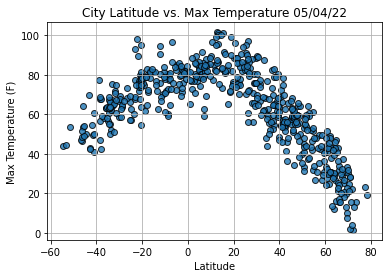

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_maxtemp.png")

# Show plot.
plt.show()

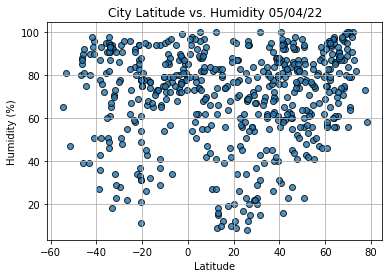

In [12]:
# scatter plot for latitude and humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Format graph.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_humidity.png")

# Show plot.
plt.show()

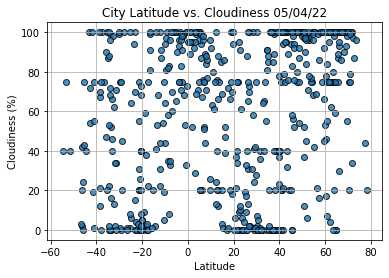

In [13]:
# plot latitude v. cloudiness
plt.scatter(lats,
            clouds,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Format graph.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_cloudiness.png")

# Show plot.
plt.show()

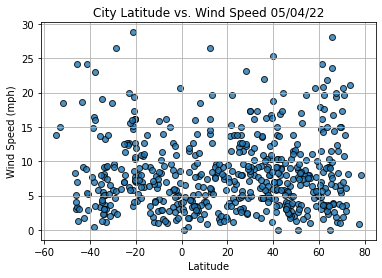

In [14]:
# plot lat v windspeed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Format graph.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_windspeed.png")

# Show plot.
plt.show()

In [66]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [67]:
# create northern and southern dataframes by using loc on the city_data2_df

# index10 = city_data2_df.loc[10]
# index10

n_hemi_df = city_data2_df.loc[(city_data2_df["Lat"] >= 0)]
n_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-05-04 17:46:57,71.9167,114.0833,22.01,91,100,6.17
2,Khatanga,RU,2022-05-04 17:46:58,71.9667,102.5000,1.54,100,97,2.75
3,Severo-Kurilsk,RU,2022-05-04 17:46:59,50.6789,156.1250,33.49,87,97,3.76
4,Dingle,PH,2022-05-04 17:46:59,10.9995,122.6711,77.40,82,80,7.36
5,Roma,US,2022-05-04 17:47:00,43.2128,-75.4557,55.72,96,100,8.05
6,Jamestown,US,2022-05-04 17:45:09,42.0970,-79.2353,53.53,94,100,10.36
8,Buraydah,SA,2022-05-04 17:47:01,26.3260,43.9750,97.25,12,31,8.03
22,Dikson,RU,2022-05-04 17:47:08,73.5069,80.5464,15.66,82,96,21.03
24,Bilma,NE,2022-05-04 17:47:09,18.6853,12.9164,99.12,10,100,7.34
27,Bilibino,RU,2022-05-04 17:47:11,68.0546,166.4372,25.07,96,100,1.10


In [68]:
s_hemi_df = city_data2_df.loc[(city_data2_df["Lat"] < 0)]
s_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kavieng,PG,2022-05-04 17:46:57,-2.5744,150.7967,82.49,77,75,10.92
7,Saldanha,ZA,2022-05-04 17:47:00,-33.0117,17.9442,64.45,92,66,9.22
9,Hobart,AU,2022-05-04 17:47:02,-42.8794,147.3294,43.05,90,72,9.22
10,Caucaia,BR,2022-05-04 17:47:02,-3.7361,-38.6531,84.15,72,75,12.66
11,Souillac,MU,2022-05-04 17:47:03,-20.5167,57.5167,79.18,78,40,16.11
12,Salinopolis,BR,2022-05-04 17:47:03,-0.6136,-47.3561,81.45,79,73,6.76
13,Batemans Bay,AU,2022-05-04 17:47:04,-35.7167,150.1833,63.10,95,90,3.40
14,Cabedelo,BR,2022-05-04 17:47:04,-6.9811,-34.8339,86.67,77,60,16.11
15,Carnarvon,AU,2022-05-04 17:47:04,-24.8667,113.6333,62.67,67,6,8.05
16,Busselton,AU,2022-05-04 17:47:05,-33.6500,115.3333,52.18,65,0,13.24


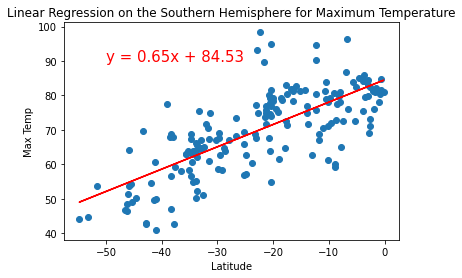

In [56]:
# call the function with given parameters for northern/southern hemispheres
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(
    x_values, y_values,
    'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


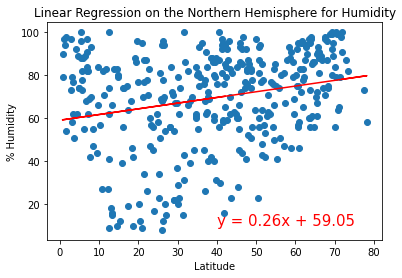

In [59]:
# find correlation between lat and % humidity
x_values = n_hemi_df["Lat"]
y_values = n_hemi_df["Humidity"]

plot_linear_regression(
x_values, y_values, "Linear Regression on the Northern Hemisphere for Humidity", "% Humidity", (40,10))

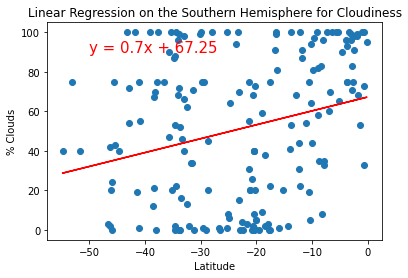

In [70]:
# find correlation between lat and % cloudiness
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Cloudiness"]

plot_linear_regression(
x_values, y_values, "Linear Regression on the Southern Hemisphere for Cloudiness", "% Clouds", (-50,90))

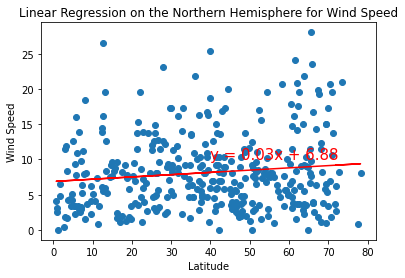

In [72]:
# find correlation between lat and windspeed
x_values = n_hemi_df["Lat"]
y_values = n_hemi_df["Wind Speed"]

plot_linear_regression(
x_values, y_values, "Linear Regression on the Northern Hemisphere for Wind Speed", "Wind Speed", (40,10))

In [78]:
# create heat maps with gmaps
import gmaps
from config import g_key

ImportError: cannot import name 'g_key' from 'config' (/Users/conorhanson/Desktop/Ed/Data_UMN/DataWork_CH/Bootcamp_Homework/World_Weather_Analysis/config.py)